In [187]:
import matplotlib.pyplot as plt
import math
from PIL import Image as im
import numpy as np
from scipy.sparse.linalg import eigs
import random

random.seed(23)
images = np.zeros((80,80,3,16),dtype='float')

for i in range(1,17):
    image = im.open('ques/data/data_fruit/image_'+str(i)+'.png')
    img_data = np.asarray(image)
    images[:,:,:,i-1] += img_data
images = images/255

images = images.reshape(19200, 16)
    

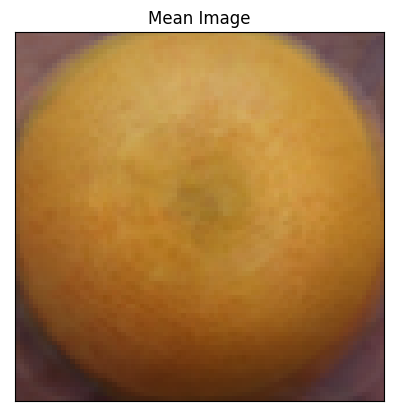

In [188]:
mean = np.zeros((19200,))
for i in range(16):
    mean += images[:,i]
mean = mean/16
plt.imshow(mean.reshape(80,80,3))
plt.xticks([])
plt.yticks([])
plt.title("Mean Image")
plt.show()

In [189]:
mean = np.array([mean]).T
print(mean.shape)
cov = ((images-mean)@(images- mean).T)/15

(19200, 1)


In [190]:
eigenVal, eigenVec = eigs(cov, k=10)
# eigV, eigenVec = eigs(cov, k=4)
idx = np.argsort(eigenVal)
eigenVec = np.real(eigenVec[:,idx])
eigenVal = np.real(eigenVal[idx])
# print(eigenVal)

In [191]:
eigenPlot = eigenVal[-1::-1]


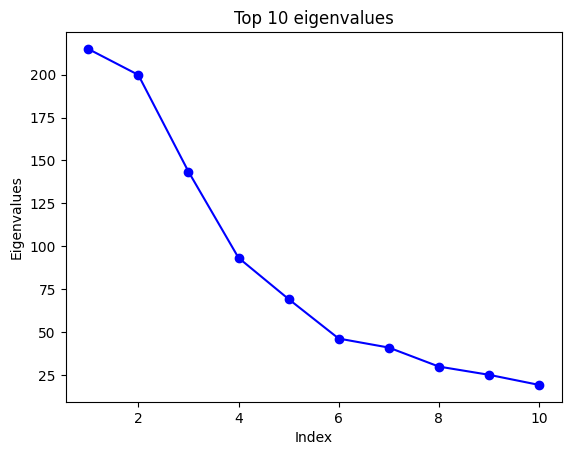

In [192]:
plt.plot(list(range(1, 11)), eigenPlot, 'bo' ,linestyle="-")
plt.ylabel("Eigenvalues")
plt.xlabel("Index")
plt.title("Top 10 eigenvalues")
plt.show()

In [193]:
eigenVec = eigenVec[:,-1::-1]

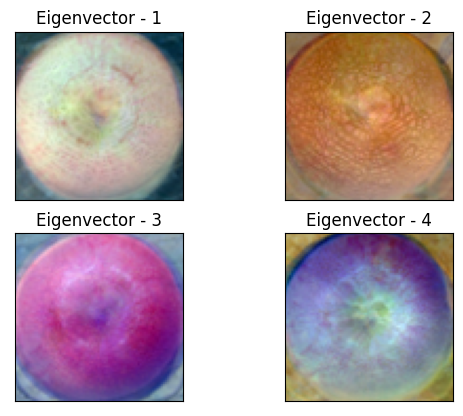

In [194]:
for i in range(0,4):
    plt.subplot(2, 2, i+1)
    eigenvect = eigenVec[:, i].reshape(19200, 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Eigenvector - {i+1}")
    plt.imshow(((eigenvect+abs(np.min(eigenvect)))/(np.max(eigenvect) - np.min(eigenvect))).reshape(80, 80, 3))
plt.show()

In [195]:
def getClosestImg(E, I):
    return E@((np.linalg.inv((E.T)@E))@(E.T@I))

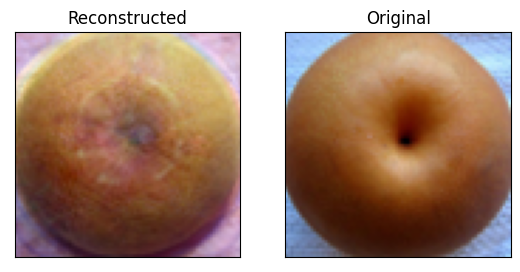

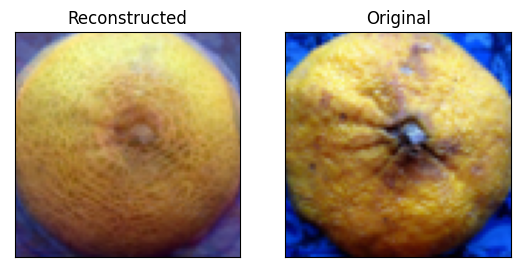

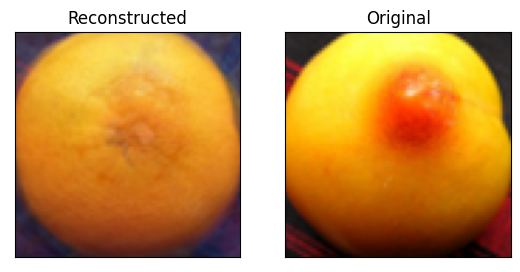

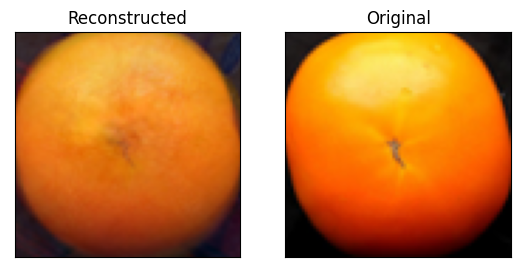

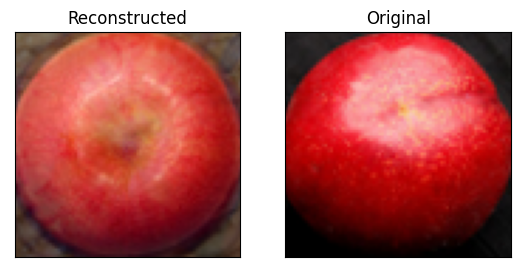

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


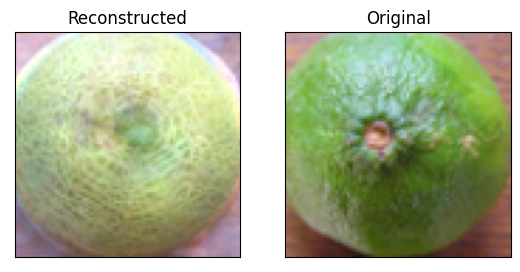

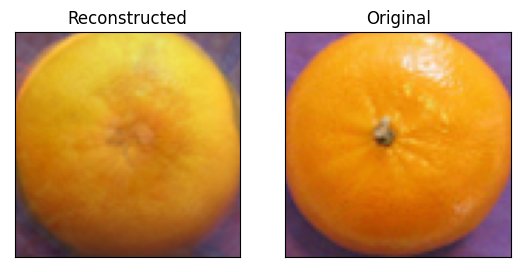

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


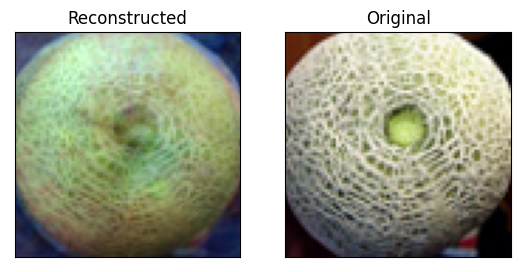

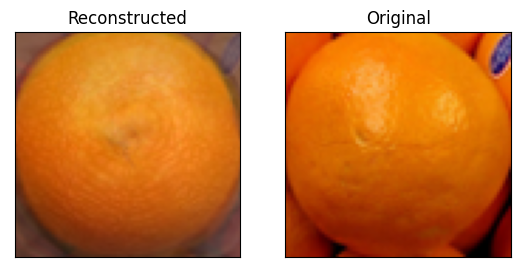

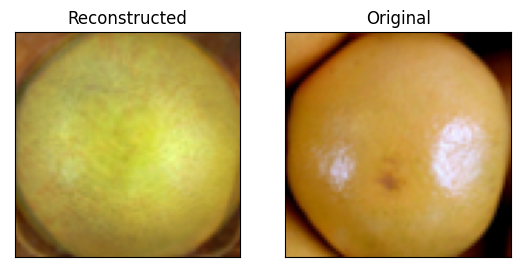

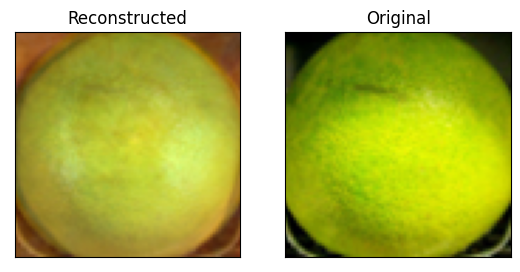

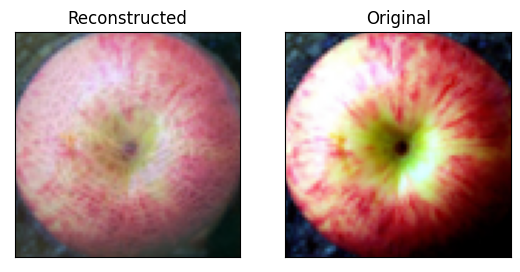

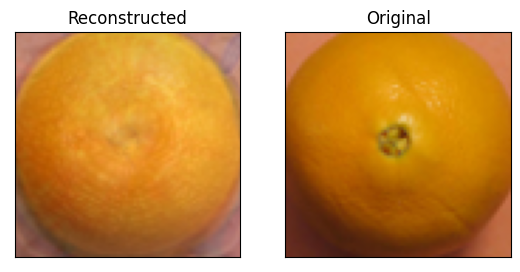

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


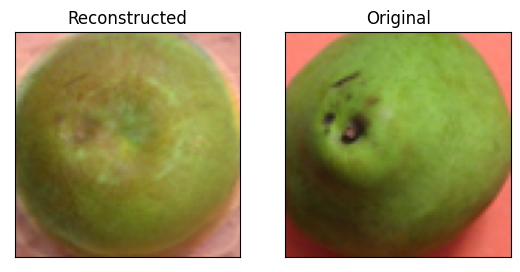

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


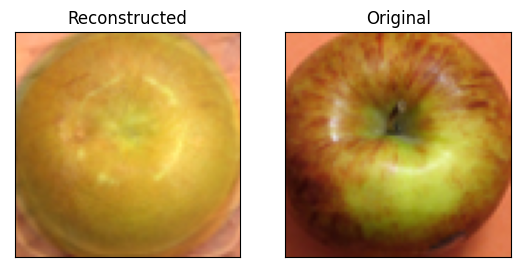

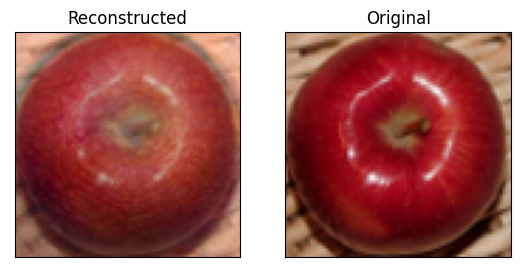

In [196]:
# plt.figure(figsize=(7, 20))
E = eigenVec[:, range(4)]*np.sqrt(np.array(eigenVal[:4]).reshape(1, 4))

for i in range(16):
    closest = getClosestImg(E, images[:, i].reshape(19200, 1)- mean.reshape(19200, 1))
    plt.subplot(1, 2, 1)
    
    final = closest.reshape(19200, 1) + mean.reshape(19200, 1)
    final = ((final + abs(np.min(final)))/(np.max(final) - np.min(final))).reshape(80, 80, 3)

    plt.title("Reconstructed")
    # plt.imshow(closest.reshape(80, 80, 3) + mean.reshape(80, 80, 3))
    plt.imshow(final)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.title("Original")
    plt.imshow(images[:, i].reshape(80, 80, 3))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [207]:
def genDiag(a, k):
    K = np.zeros((k,k))
    for i in range(k):
        K[i, i] = math.sqrt(a[i])
    return K

In [218]:
eigenVal = eigenVal[-1::-1]
print(eigenVal)

[215.01372194 199.88567118 143.57753796  93.29015102  69.24159738
  46.23304841  40.98669884  29.9045517   25.11583252  19.21944289]


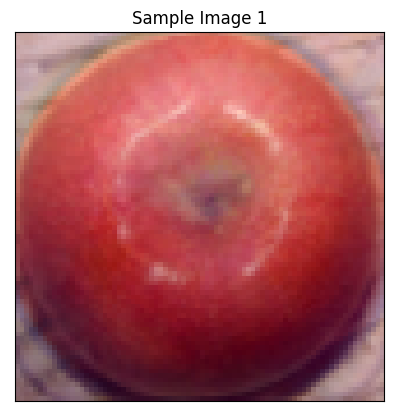

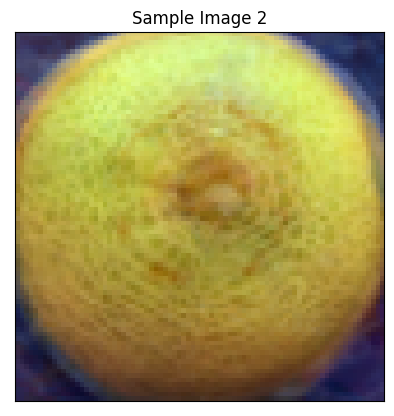

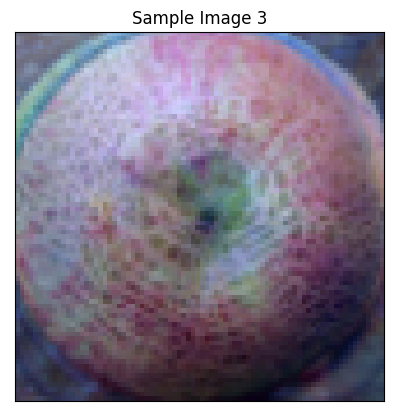

In [221]:
S = genDiag(eigenVal, 4)
regenVec = eigenVec[:,range(4)]

for i in range(1,4):
    eigenNew = regenVec@S@np.random.normal(0, 1, (4))+mean.reshape(19200)
    eigenNew = ((eigenNew + abs(np.min(eigenNew)))/(np.max(eigenNew) + abs(np.min(eigenNew))))
    plt.imshow((eigenNew).reshape(80, 80, 3))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Sample Image {i}")
    plt.show()

